### Objective 3: To identify segmentation clusters based on location and house prices
Segmentation analysis is used to divide a dataset into distinct groups using an identified criteria. In this case, we are going to perform a segmentation analysis on house prices based on the latitude and longitude (The location of the property). This is particularly helpful in creating ‘neighborhoods’ based on house prices. The real estate company can therefore know the house prices in the various geographic regions and where the real value for money would be.

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
 # Load your data into a DataFrame
data = pd.read_csv('data/kc_house_cleaned_data.csv')
data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,6414100192,2014-12-09,538000.0,3,2,2570.0,7242.0,2,NO,NONE,...,7,2170.0,400.0,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
1,2487200875,2014-12-09,604000.0,4,3,1960.0,5000.0,1,NO,NONE,...,7,1050.0,910.0,1965,0,98136,47.5208,-122.393,1360.0,5000.0
2,1954400510,2015-02-18,510000.0,3,2,1680.0,8080.0,1,NO,NONE,...,8,1680.0,0.0,1987,0,98074,47.6168,-122.045,1800.0,7503.0
3,7237550310,2014-05-12,1230000.0,4,4,5420.0,101930.0,1,NO,NONE,...,11,3890.0,1530.0,2001,0,98053,47.6561,-122.005,4760.0,101930.0
4,1321400060,2014-06-27,257500.0,3,2,1715.0,6819.0,2,NO,NONE,...,7,1715.0,NaN,1995,0,98003,47.3097,-122.327,2238.0,6819.0


In [4]:
#Run data info to check the data types for the instances
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15762 entries, 0 to 15761
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   date           15762 non-null  object 
 2   price          15762 non-null  float64
 3   bedrooms       15762 non-null  int64  
 4   bathrooms      15762 non-null  int64  
 5   sqft_living    15762 non-null  float64
 6   sqft_lot       15762 non-null  float64
 7   floors         15762 non-null  int64  
 8   waterfront     15762 non-null  object 
 9   view           15762 non-null  object 
 10  condition      15762 non-null  object 
 11  grade          15762 non-null  int64  
 12  sqft_above     15762 non-null  float64
 13  sqft_basement  15429 non-null  float64
 14  yr_built       15762 non-null  int64  
 15  yr_renovated   15762 non-null  int64  
 16  zipcode        15762 non-null  int64  
 17  lat            15762 non-null  float64
 18  long  

In [5]:
# Attempt to convert the 'price' column to a numeric data type
try:
    data['price'] = pd.to_numeric(data['price'])
    print("The 'price' column contains only numeric values.")
except ValueError:
    print("The 'price' column contains non-numeric or string values.")

The 'price' column contains only numeric values.


In [6]:
# Check for and handle missing values if necessary
data.dropna(subset=['price'], inplace=True)  # Drop rows with missing 'price' values
# Drop rows with missing 'price' values
data.dropna(subset=['price'], inplace=True)


In [9]:
# Define the number of quantiles and labels for the categories
num_quantiles = 4
labels = ['Low', 'Medium-Low', 'Medium-High', 'High']

# Create house price categories based on quantiles
data['price_category'] = pd.qcut(data['price'], q=num_quantiles, labels=labels)

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_category
0,6414100192,2014-12-09,538000.0,3,2,2570.0,7242.0,2,NO,NONE,...,2170.0,400.0,1951,1991,98125,47.7210,-122.319,1690.0,7639.0,Medium-High
1,2487200875,2014-12-09,604000.0,4,3,1960.0,5000.0,1,NO,NONE,...,1050.0,910.0,1965,0,98136,47.5208,-122.393,1360.0,5000.0,Medium-High
2,1954400510,2015-02-18,510000.0,3,2,1680.0,8080.0,1,NO,NONE,...,1680.0,0.0,1987,0,98074,47.6168,-122.045,1800.0,7503.0,Medium-High
3,7237550310,2014-05-12,1230000.0,4,4,5420.0,101930.0,1,NO,NONE,...,3890.0,1530.0,2001,0,98053,47.6561,-122.005,4760.0,101930.0,High
4,1321400060,2014-06-27,257500.0,3,2,1715.0,6819.0,2,NO,NONE,...,1715.0,NaN,1995,0,98003,47.3097,-122.327,2238.0,6819.0,Low


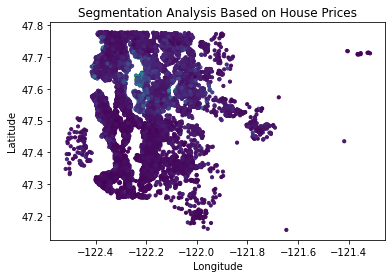

In [10]:
# Define a color mapping for the categories
color_mapping = {'Low': 'blue', 'Medium-Low': 'green', 'Medium-High': 'yellow', 'High': 'red'}

# Map the price categories to colors
data['price_color'] = data['price_category'].map(color_mapping)

# Visualize the segmentation on a scatter plot
plt.scatter(data['long'], data['lat'], c=data['price'], marker='o', s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Segmentation Analysis Based on House Prices')
plt.show()

In [11]:
import scipy as sp
from scipy import sparse
from sklearn.cluster import KMeans

# Define the number of clusters (you need to decide this based on your problem)
n_clusters = 3

# Create a K-means clustering model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model to your data
data['cluster'] = kmeans.fit_predict(data[['lat', 'long', 'price']])



/Users/dominic/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


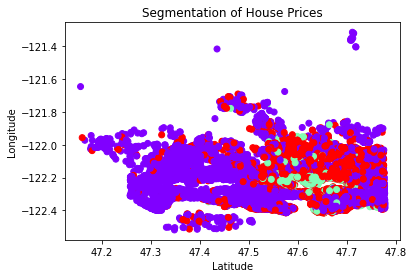

In [12]:
import matplotlib.pyplot as plt

# Scatter plot to visualize clusters
plt.scatter(data['lat'], data['long'], c=data['cluster'], cmap='rainbow')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Segmentation of House Prices')
plt.show()


In [13]:
segment_means = data.groupby('cluster')['price'].mean()
print(segment_means)


cluster
0    3.807987e+05
1    2.114938e+06
2    8.297104e+05
Name: price, dtype: float64
